<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1574]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1575]:
# Checking the tn.movie_budgets file
df_budget = pd.read_csv('/Users/Vidya/Flatiron/Project/tn.movie_budgets.csv')
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [1576]:
df_budget.head()
df_budget['release_date'].max()  # to check the max date in the file

'Sep 9, 2016'

In [1577]:
#Formatting the Release Date column
df_budget ['release_date'] =  pd.to_datetime(df_budget['release_date'], infer_datetime_format=True)

df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [1578]:
#Replacing the '$' sign
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')

df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [1579]:
#delete commas fromc"production_budget,domestic_gross and worldwide_gross columns"
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')

df_budget['movie'] = df_budget['movie'].str.lower() #Converting movie to lower case

df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [1580]:
#Storing as int64 to hold large numeric values
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

df_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [1581]:
df_budget.drop_duplicates()
df_budget['movie'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                            avatar
1       pirates of the caribbean: on stranger tides
2                                      dark phoenix
3                           avengers: age of ultron
4                 star wars ep. viii: the last jedi
                           ...                     
5777                                         red 11
5778                                      following
5779                  return to the land of wonders
5780                           a plague so pleasant
5781                              my date with drew
Name: movie, Length: 5782, dtype: object>

In [1582]:
df_budget.set_index('movie',inplace=True)
df_budget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
avatar,1,2009-12-18,425000000,760507625,2776345279
pirates of the caribbean: on stranger tides,2,2011-05-20,410600000,241063875,1045663875
dark phoenix,3,2019-06-07,350000000,42762350,149762350
avengers: age of ultron,4,2015-05-01,330600000,459005868,1403013963
star wars ep. viii: the last jedi,5,2017-12-15,317000000,620181382,1316721747


In [1583]:
df_budget.drop(['id'], axis=1, inplace=True)
df_budget.head()

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
avatar,2009-12-18,425000000,760507625,2776345279
pirates of the caribbean: on stranger tides,2011-05-20,410600000,241063875,1045663875
dark phoenix,2019-06-07,350000000,42762350,149762350
avengers: age of ultron,2015-05-01,330600000,459005868,1403013963
star wars ep. viii: the last jedi,2017-12-15,317000000,620181382,1316721747


In [1584]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, avatar to my date with drew
Data columns (total 4 columns):
release_date         5782 non-null datetime64[ns]
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 225.9+ KB


In [1585]:
#Dropping any duplicate columns
#df_budget.drop_duplicates()
#df_budget['movie'].value_counts
#df_budget.head()
#df_budget.info()

In [1586]:
#df_budget.to_csv('Unique_Budget_Movies.csv', encoding='utf-8')
#df_budget.info()

In [1587]:
df_budget.isna().sum()

release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [1588]:
df_imdb_title_basics = pd.read_csv('/Users/Vidya/Flatiron/Project/title.basics.csv')
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [1589]:
#Checking for any duplicates
df_imdb_title_basics.drop_duplicates(subset=None, keep='first')
df_imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [1590]:
df_imdb_title_basics["genres"].nunique()

1085

In [1591]:
#Dropping unwanted columns
df_imdb_title_basics = df_imdb_title_basics.drop(columns = ['original_title','start_year','tconst'])
df_imdb_title_basics.head()

,primary_title,runtime_minutes,genres
0,Sunghursh,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,The Other Side of the Wind,122.0,Drama
3,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [1592]:
#Renaming the column Primary title
df_imdb_title_basics = df_imdb_title_basics.rename(columns={'primary_title' : 'movie'})
df_imdb_title_basics ['movie'] = df_imdb_title_basics ['movie'].str.lower()
df_imdb_title_basics.set_index('movie',inplace=True)
df_imdb_title_basics.head()
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh to chico albuquerque - revelações
Data columns (total 2 columns):
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [1593]:
df_tmdb_movies = pd.read_csv('/Users/Vidya/Flatiron/Project/tmdb.movies.csv')
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [1594]:
df_tmdb_movies.drop_duplicates(subset=None, keep='first')
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [1595]:
df_tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [1596]:
#Dropping unnecessary columns
df_tmdb_movies = df_tmdb_movies.drop(columns = ['Unnamed: 0','id','popularity','genre_ids','title','vote_count'])
df_tmdb_movies.head()

,original_language,original_title,release_date,vote_average
0,en,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7
1,en,How to Train Your Dragon,2010-03-26,7.7
2,en,Iron Man 2,2010-05-07,6.8
3,en,Toy Story,1995-11-22,7.9
4,en,Inception,2010-07-16,8.3


In [1597]:
df_tmdb_movies = df_tmdb_movies.rename(columns={'original_title' : 'movie'})
df_tmdb_movies.head()

,original_language,movie,release_date,vote_average
0,en,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7
1,en,How to Train Your Dragon,2010-03-26,7.7
2,en,Iron Man 2,2010-05-07,6.8
3,en,Toy Story,1995-11-22,7.9
4,en,Inception,2010-07-16,8.3


In [1598]:
df_tmdb_movies['movie'] = df_tmdb_movies['movie'].str.lower()

df_tmdb_movies.set_index('movie',inplace=True)
df_tmdb_movies.head()

,original_language,release_date,vote_average
movie,,,
harry potter and the deathly hallows: part 1,en,2010-11-19,7.7
how to train your dragon,en,2010-03-26,7.7
iron man 2,en,2010-05-07,6.8
toy story,en,1995-11-22,7.9
inception,en,2010-07-16,8.3


In [1599]:
df_merged = df_tmdb_movies.merge(df_imdb_title_basics, on='movie').merge(df_budget, on='movie')

#df_merged = df_merged[~df_merged.index.duplicated(keep='first')]
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, how to train your dragon to enough
Data columns (total 9 columns):
original_language    4363 non-null object
release_date_x       4363 non-null object
vote_average         4363 non-null float64
runtime_minutes      3936 non-null float64
genres               4294 non-null object
release_date_y       4363 non-null datetime64[ns]
production_budget    4363 non-null int64
domestic_gross       4363 non-null int64
worldwide_gross      4363 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 340.9+ KB


,original_language,release_date_x,vote_average,runtime_minutes,genres,release_date_y,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,,
how to train your dragon,en,2010-03-26,7.7,98.0,"Action,Adventure,Animation",2010-03-26,165000000,217581232,494870992
iron man 2,en,2010-05-07,6.8,124.0,"Action,Adventure,Sci-Fi",2010-05-07,170000000,312433331,621156389
inception,en,2010-07-16,8.3,148.0,"Action,Adventure,Sci-Fi",2010-07-16,160000000,292576195,835524642
percy jackson & the olympians: the lightning thief,en,2010-02-11,6.1,118.0,"Adventure,Family,Fantasy",2010-02-12,95000000,88768303,223050874
avatar,en,2009-12-18,7.4,93.0,Horror,2009-12-18,425000000,760507625,2776345279


In [1600]:
df_merged = df_merged.drop_duplicates(subset=None, keep='first')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4052 entries, how to train your dragon to enough
Data columns (total 9 columns):
original_language    4052 non-null object
release_date_x       4052 non-null object
vote_average         4052 non-null float64
runtime_minutes      3685 non-null float64
genres               3994 non-null object
release_date_y       4052 non-null datetime64[ns]
production_budget    4052 non-null int64
domestic_gross       4052 non-null int64
worldwide_gross      4052 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 316.6+ KB


In [1601]:
df_merged.duplicated().value_counts()

False    4052
dtype: int64

In [1602]:
df_merged['genres'].isna().sum()

58

In [1603]:
df_merged['runtime_minutes'].isna().sum()

367

In [1604]:
df_merged = df_merged.dropna(subset=['genres'])
df_merged = df_merged.dropna(subset=['runtime_minutes'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, how to train your dragon to enough
Data columns (total 9 columns):
original_language    3668 non-null object
release_date_x       3668 non-null object
vote_average         3668 non-null float64
runtime_minutes      3668 non-null float64
genres               3668 non-null object
release_date_y       3668 non-null datetime64[ns]
production_budget    3668 non-null int64
domestic_gross       3668 non-null int64
worldwide_gross      3668 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 286.6+ KB


In [1605]:
df_merged['Collections'] = df_merged['domestic_gross'] + df_merged['worldwide_gross']
df_merged['Collections'].head()

movie
how to train your dragon                               712452224
iron man 2                                             933589720
inception                                             1128100837
percy jackson & the olympians: the lightning thief     311819177
avatar                                                3536852904
Name: Collections, dtype: int64

In [1606]:
df_merged['Profit'] = df_merged['Collections'] - df_merged['production_budget']
df_merged['Profit'].head()

movie
how to train your dragon                               547452224
iron man 2                                             763589720
inception                                              968100837
percy jackson & the olympians: the lightning thief     216819177
avatar                                                3111852904
Name: Profit, dtype: int64

In [1607]:
df_merged.reset_index(col_level=1)
df_merged.head()

,original_language,release_date_x,vote_average,runtime_minutes,genres,release_date_y,production_budget,domestic_gross,worldwide_gross,Collections,Profit
movie,,,,,,,,,,,
how to train your dragon,en,2010-03-26,7.7,98.0,"Action,Adventure,Animation",2010-03-26,165000000,217581232,494870992,712452224,547452224
iron man 2,en,2010-05-07,6.8,124.0,"Action,Adventure,Sci-Fi",2010-05-07,170000000,312433331,621156389,933589720,763589720
inception,en,2010-07-16,8.3,148.0,"Action,Adventure,Sci-Fi",2010-07-16,160000000,292576195,835524642,1128100837,968100837
percy jackson & the olympians: the lightning thief,en,2010-02-11,6.1,118.0,"Adventure,Family,Fantasy",2010-02-12,95000000,88768303,223050874,311819177,216819177
avatar,en,2009-12-18,7.4,93.0,Horror,2009-12-18,425000000,760507625,2776345279,3536852904,3111852904


In [1608]:
df_merged = df_merged.sort_values(by='movie', ascending=True)
df_merged.head()

,original_language,release_date_x,vote_average,runtime_minutes,genres,release_date_y,production_budget,domestic_gross,worldwide_gross,Collections,Profit
movie,,,,,,,,,,,
#horror,de,2015-11-20,3.3,101.0,"Crime,Drama,Horror",2015-11-20,1500000,0,0,0,-1500000
10 cloverfield lane,en,2016-03-11,6.9,103.0,"Drama,Horror,Mystery",2016-03-11,5000000,72082999,108286422,180369421,175369421
10 days in a madhouse,en,2015-11-20,5.4,111.0,Drama,2015-11-11,12000000,14616,14616,29232,-11970768
12 strong,en,2018-01-19,5.6,130.0,"Action,Drama,History",2018-01-19,35000000,45819713,71118378,116938091,81938091
12 years a slave,en,2013-10-30,7.9,134.0,"Biography,Drama,History",2013-10-18,20000000,56671993,181025343,237697336,217697336


In [1609]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, #horror to zootopia
Data columns (total 11 columns):
original_language    3668 non-null object
release_date_x       3668 non-null object
vote_average         3668 non-null float64
runtime_minutes      3668 non-null float64
genres               3668 non-null object
release_date_y       3668 non-null datetime64[ns]
production_budget    3668 non-null int64
domestic_gross       3668 non-null int64
worldwide_gross      3668 non-null int64
Collections          3668 non-null int64
Profit               3668 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 343.9+ KB


In [1610]:
df_merged['release_year'] = pd.DatetimeIndex(df_merged['release_date_y']).year
df_merged['release_month'] = pd.DatetimeIndex(df_merged['release_date_y']).month
df_merged['Month'] = pd.to_datetime(df_merged['release_date_y'], format='%m').dt.month_name()

def seasons(season):
    return season.map(lambda x: "winter/holiday" if x > 11 or x < 3
                                         else ("spring" if x >= 3 and x < 6
                                         else ("summer" if x > 5 and x < 9
                                         else ("Fall"))))

df_merged['release_season'] = seasons(df_merged['release_month'])

def quarterly(quarter):
    return quarter.map(lambda x: "Q1" if x < 4
                                         else ("Q2" if x < 7
                                         else ("Q3" if x < 10
                                         else ("Q4"))))

df_merged['release_quarter'] = quarterly(df_merged['release_month'])

df_merged.head(20)
df_merged['release_season'].value_counts()

spring            1046
summer             890
Fall               888
winter/holiday     844
Name: release_season, dtype: int64

In [1611]:
df_merged = df_merged.drop_duplicates(subset=None, keep='first')
df_merged.head()
df_merged.info()
df_merged['genres'].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, #horror to zootopia
Data columns (total 16 columns):
original_language    3668 non-null object
release_date_x       3668 non-null object
vote_average         3668 non-null float64
runtime_minutes      3668 non-null float64
genres               3668 non-null object
release_date_y       3668 non-null datetime64[ns]
production_budget    3668 non-null int64
domestic_gross       3668 non-null int64
worldwide_gross      3668 non-null int64
Collections          3668 non-null int64
Profit               3668 non-null int64
release_year         3668 non-null int64
release_month        3668 non-null int64
Month                3668 non-null object
release_season       3668 non-null object
release_quarter      3668 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 487.2+ KB


307

In [1630]:
#sorting dataframe by profit in descending order
df_merged = df_merged.sort_values(by=['Profit'], ascending = False)


# dropping null value columns to avoid errors 
#data.dropna(inplace = True) 
  
# new data frame with split value columns 
#new_genre = df_merged['genres'].str.split(",", expand=True)
  
# making separate first name column from new data frame 
#df_merged['new_genre']= new_genre[0] 
  
# making separate last name column from new data frame 
#df_merged['2nd_Genre']= new_genre[1] 
#Final_genre = df_merged.concat['new_genre','2nd_Genre']  

# Dropping old Name columns 
#data.drop(columns =["Name"], inplace = True) 
  
# df display 
#df_merged.head()
df_merged.drop(df_merged[df_merged[('release_year')] > 2019].index, axis=0, inplace=True)
df_merged.drop(df_merged[df_merged[('Profit')] <= 0].index, axis=0, inplace=True)
df_merged.head(10)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, avatar to newlyweds
Data columns (total 16 columns):
original_language    2090 non-null object
release_date_x       2090 non-null object
vote_average         2090 non-null float64
runtime_minutes      2090 non-null float64
genres               2090 non-null object
release_date_y       2090 non-null datetime64[ns]
production_budget    2090 non-null int64
domestic_gross       2090 non-null int64
worldwide_gross      2090 non-null int64
Collections          2090 non-null int64
Profit               2090 non-null int64
release_year         2090 non-null int64
release_month        2090 non-null int64
Month                2090 non-null object
release_season       2090 non-null object
release_quarter      2090 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 277.6+ KB


In [1613]:
#getting the top genre categories
top_genres = df_merged['genres'].value_counts()
top_genres_list = list(top_genres.head(15).keys())
#top_genres_list

In [1614]:
main_genres = []
for n in top_genres_list:
    main_genres.append(df_merged.loc[(df_merged['genres'] == n)])

main_genres = pd.concat(main_genres)

genres_profit = main_genres.groupby(main_genres['genres']).mean()
genres_profit = genres_profit.sort_values(by='Profit',ascending=False)
#genres_profit.head()

#genres_profit['production_budget'] = genres_profit['production_budget'].astype('int64')
#genres_profit['domestic_gross'] = genres_profit['domestic_gross'].astype('int64')
#genres_profit['worldwide_gross'] = genres_profit['worldwide_gross'].astype('int64')
#genres_profit['Profit'] = genres_profit['Profit'].astype('int64')
#genres_profit['release_year'] =  pd.to_datetime(genres_profit['release_year'], infer_datetime_format=True)

#genres_profit.head(15)
#df_merged['new_genre'].nunique()
#df_merged.info()

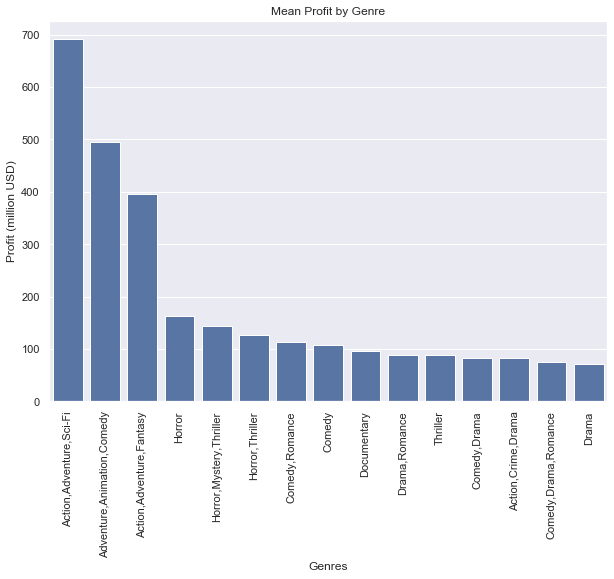

In [1615]:
#Plotting the Chart between Genre and Profit

sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
g=sns.barplot(x=genres_profit.index,y=genres_profit.Profit/1000000,color="b")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Mean Profit by Genre") 
g.set(xlabel='Genres', ylabel='Profit (million USD)')
plt.show()

In [1616]:
df_new=df_merged[df_merged['release_year']>=2009]

df_new.head(10)

,original_language,release_date_x,vote_average,runtime_minutes,genres,release_date_y,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year,release_month,Month,release_season,release_quarter
movie,,,,,,,,,,,,,,,,
avatar,en,2009-12-18,7.4,93.0,Horror,2009-12-18,425000000,760507625,2776345279,3536852904,3111852904,2009,12,December,winter/holiday,Q4
avengers: infinity war,en,2018-04-27,8.3,149.0,"Action,Adventure,Sci-Fi",2018-04-27,300000000,678815482,2048134200,2726949682,2426949682,2018,4,April,spring,Q2
jurassic world,en,2015-06-12,6.6,124.0,"Action,Adventure,Sci-Fi",2015-06-12,215000000,652270625,1648854864,2301125489,2086125489,2015,6,June,summer,Q2
the avengers,en,2012-05-04,7.6,143.0,"Action,Adventure,Sci-Fi",2012-05-04,225000000,623279547,1517935897,2141215444,1916215444,2012,5,May,spring,Q2
black panther,en,2018-02-16,7.4,134.0,"Action,Adventure,Sci-Fi",2018-02-16,200000000,700059566,1348258224,2048317790,1848317790,2018,2,February,winter/holiday,Q1
black panther,en,2011-01-18,5.1,134.0,"Action,Adventure,Sci-Fi",2018-02-16,200000000,700059566,1348258224,2048317790,1848317790,2018,2,February,winter/holiday,Q1
furious 7,en,2015-04-03,7.3,137.0,"Action,Crime,Thriller",2015-04-03,190000000,353007020,1518722794,1871729814,1681729814,2015,4,April,spring,Q2
incredibles 2,en,2018-06-15,7.6,118.0,"Action,Adventure,Animation",2018-06-15,200000000,608581744,1242520711,1851102455,1651102455,2018,6,June,summer,Q2
beauty and the beast,en,2017-03-17,6.9,60.0,"Family,Fantasy,Musical",2017-03-17,160000000,504014165,1259199706,1763213871,1603213871,2017,3,March,spring,Q1


[Text(0, 0.5, '$'), Text(0.5, 1.0, ' Budget Vs Gross')]

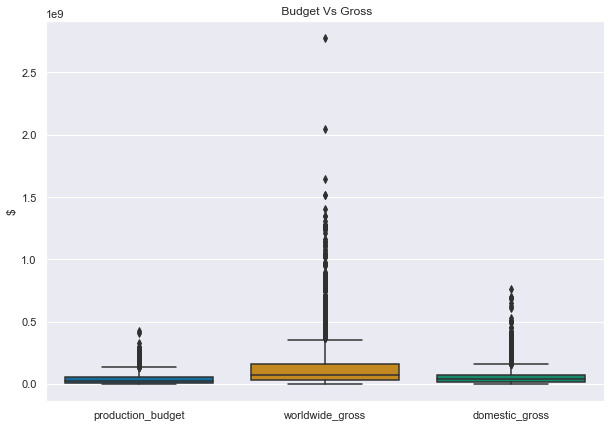

In [1617]:
profit_gross_df = df_merged.filter(['production_budget', 'worldwide_gross', 'domestic_gross'], axis=1)
boxplot = sns.boxplot(data=profit_gross_df, palette="colorblind")
boxplot.set(ylabel='$', title=' Budget Vs Gross')

Text(0.5, 0, 'Production Budget')

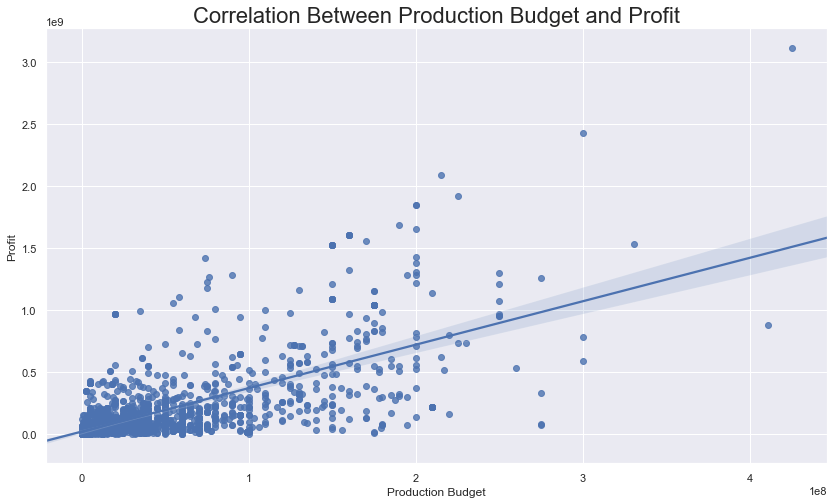

In [1643]:
plt.figure(figsize=(14,8))
sns.regplot( x='production_budget', y='Profit', data=df_merged)
plt.title('Correlation Between Production Budget and Profit', fontsize=22)
plt.ylabel('Profit')
plt.xlabel('Production Budget')

In [1619]:
df_fav=df_new[['Profit','release_year']]
#df_fav.groupby(df_fav.index).first()
#df_fav = df_fav[~df_fav.index.duplicated(keep='first')]
df_fav.head(20)

,Profit,release_year
movie,,
avatar,3111852904,2009
avengers: infinity war,2426949682,2018
jurassic world,2086125489,2015
the avengers,1916215444,2012
black panther,1848317790,2018
black panther,1848317790,2018
furious 7,1681729814,2015
incredibles 2,1651102455,2018
beauty and the beast,1603213871,2017


In [1620]:
grouped_new = df_fav.groupby('release_year').agg({'Profit': ['min','max']})
grouped_new.head(20)

Profit            
                   min         max
release_year                      
2009          12321002  3111852904
2010            137245  1283884402
2011            151887  1281181086
2012               168  1916215444
2013            250806  1523207919
2014             18848  1139478152
2015             55075  2086125489
2016            165667  1381280180
2017           1271238  1603213871
2018            336293  2426949682
2019          15360325   189760033

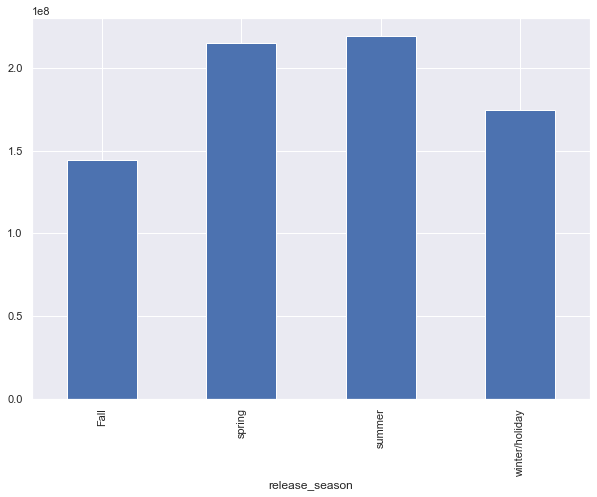

In [1637]:
df_decade_mean = df_new.groupby('release_season')['Profit'].mean()
df_decade_mean.head()
fig = df_decade_mean.plot(kind = 'bar')
#plt.savefig("chart1")

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, book club to krisha
Data columns (total 16 columns):
original_language    24 non-null object
release_date_x       24 non-null object
vote_average         24 non-null float64
runtime_minutes      24 non-null float64
genres               24 non-null object
release_date_y       24 non-null datetime64[ns]
production_budget    24 non-null int64
domestic_gross       24 non-null int64
worldwide_gross      24 non-null int64
Collections          24 non-null int64
Profit               24 non-null int64
release_year         24 non-null int64
release_month        24 non-null int64
Month                24 non-null object
release_season       24 non-null object
release_quarter      24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 3.2+ KB


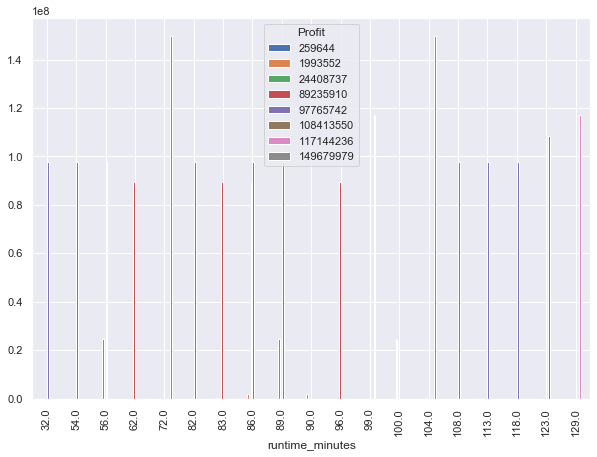

In [1622]:
df_vote = df_new[df_new['vote_average'] >= 9]
df_vote.info()
df_vote['vote_average'].max()

#df_rating = df_vote.groupby(['runtime_minutes','vote_average'])['Profit'].mean()
#df_rating.unstack().plot(kind = 'line', color='b')
# plt.savefig("chart2")

df_vote_rate = df_vote.groupby(['runtime_minutes', 'Profit'])['Profit'].mean()
fig = df_vote_rate.unstack().plot(kind='bar')
# plt.savefig("chart3")

In [1623]:
#df_run = df_vote.filter(['runtime_minutes', 'vote_average'], axis=1)
#boxplot = sns.boxplot(data=df_run, palette="colorblind")
#boxplot.set(ylabel='Runtime',title='Runtime vs Vote')


In [1624]:
#box = df_vote(column=['runtime_minutes', 'vote_average'], by='Profit',layout=(2, 1))

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, avatar to frozen
Data columns (total 16 columns):
original_language    22 non-null object
release_date_x       22 non-null object
vote_average         22 non-null float64
runtime_minutes      22 non-null float64
genres               22 non-null object
release_date_y       22 non-null datetime64[ns]
production_budget    22 non-null int64
domestic_gross       22 non-null int64
worldwide_gross      22 non-null int64
Collections          22 non-null int64
Profit               22 non-null int64
release_year         22 non-null int64
release_month        22 non-null int64
Month                22 non-null object
release_season       22 non-null object
release_quarter      22 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(6)
memory usage: 2.9+ KB


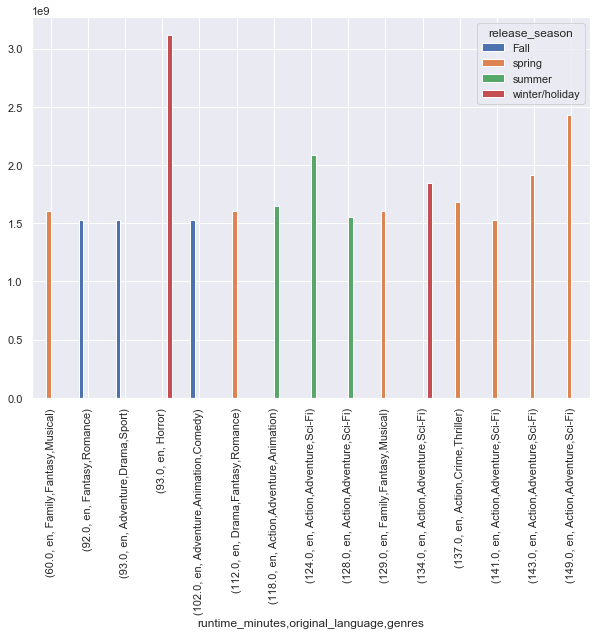

In [1625]:
df=df_merged[df_merged['Profit']>1500000000]
df.info()
df_lang_movie = df.groupby(['runtime_minutes','original_language','genres','release_season'])['Profit'].mean()
fig = df_lang_movie.unstack().plot(kind = 'bar')
#plt.savefig("chart5")

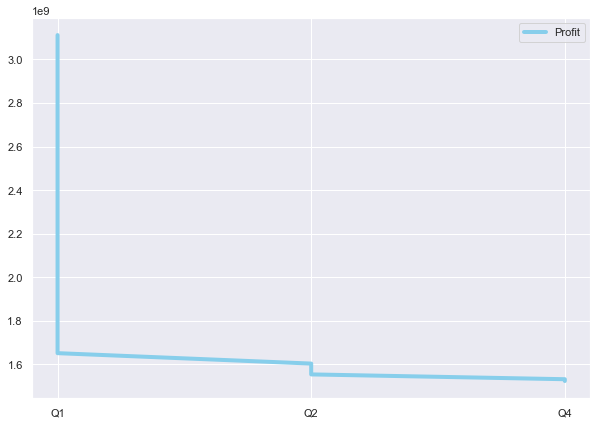

In [1639]:
plt.plot( df['release_quarter'].sort_values(),'Profit', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'Profit','genres',  data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'Profit','release_season', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="season")
plt.legend()
